In [ ]:
'''
Binary Classifier

Classify the question into two classes
Class 0: Yes/No
Class 1: Other Questions

QA Pair:
{'image_index': 5574, 'qid': 'S8', 'question_string': 'How many groups of bars are there ?', 'answer_bbox': [], 'template': 'structural', 'answer': 6, 'answer_id': 34, 'type': 'hbar', 'question_id': 95189}

x_label = question_string
y_label = answer
'''

"\nBinary Classifier\n\nClassify the question into two classes\nClass 0: Yes/No\nClass 1: Other Questions\n\nQA Pair:\n{'image_index': 5574, 'qid': 'S8', 'question_string': 'How many groups of bars are there ?', 'answer_bbox': [], 'template': 'structural', 'answer': 6, 'answer_id': 34, 'type': 'hbar', 'question_id': 95189}\n\nx_label = question_string\ny_label = answer\n"

# References

In [ ]:
# https://realpython.com/python-keras-text-classification/
# https://github.com/Sweetflowerjulia/NLP-tag-classification-with-GloVe-and-LSTM
# https://github.com/kk7nc/Text_Classification

# Download Test Images and Annotations

In [ ]:
!mkdir "plotqa"

In [ ]:
# Images

# https://drive.google.com/file/d/1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC/view?usp=sharing
!gdown -O "TEST.tar.gz" --id 1MpqaHqqPRGjRht9w672DJbxMwZx1j3qC

!tar -xvf  '/content/TEST.tar.gz' -C '/content/plotqa/'

!rm TEST.tar.gz

Streaming output truncated to the last 5000 lines.
TEST/png/9525.png
TEST/png/27535.png
TEST/png/2324.png
TEST/png/24199.png
TEST/png/5976.png
TEST/png/21791.png
TEST/png/28934.png
TEST/png/17043.png
TEST/png/4326.png
TEST/png/21901.png
TEST/png/18113.png
TEST/png/27814.png
TEST/png/20542.png
TEST/png/10557.png
TEST/png/14240.png
TEST/png/9661.png
TEST/png/22899.png
TEST/png/20728.png
TEST/png/16651.png
TEST/png/6325.png
TEST/png/24477.png
TEST/png/30715.png
TEST/png/23348.png
TEST/png/14643.png
TEST/png/17510.png
TEST/png/3392.png
TEST/png/23341.png
TEST/png/1946.png
TEST/png/32301.png
TEST/png/10984.png
TEST/png/2385.png
TEST/png/30516.png
TEST/png/13308.png
TEST/png/17750.png
TEST/png/28523.png
TEST/png/8054.png
TEST/png/25213.png
TEST/png/28977.png
TEST/png/29057.png
TEST/png/12706.png
TEST/png/12463.png
TEST/png/791.png
TEST/png/5352.png
TEST/png/20372.png
TEST/png/1647.png
TEST/png/19889.png
TEST/png/7593.png
TEST/png/24825.png
TEST/png/29991.png
TEST/png/789.png
TEST/png/13106.p

In [ ]:
!mkdir "plotqa/TEST/csv"

In [ ]:
# CSVs

# https://drive.google.com/file/d/1hEelpWBw8q-Oa2fPad6gkO51CUQ6Cqrv/view
!gdown -O "FrRCNN_test_predicted_tables_0.5.tar.gz" --id 1hEelpWBw8q-Oa2fPad6gkO51CUQ6Cqrv

!tar -xvf  '/content/FrRCNN_test_predicted_tables_0.5.tar.gz' -C '/content/plotqa/TEST/csv'

!rm FrRCNN_test_predicted_tables_0.5.tar.gz

Streaming output truncated to the last 5000 lines.
FrRCNN_test_predicted_tables_0.5/18300.csv
FrRCNN_test_predicted_tables_0.5/12027.csv
FrRCNN_test_predicted_tables_0.5/22722.csv
FrRCNN_test_predicted_tables_0.5/19837.csv
FrRCNN_test_predicted_tables_0.5/1851.csv
FrRCNN_test_predicted_tables_0.5/16218.csv
FrRCNN_test_predicted_tables_0.5/26913.csv
FrRCNN_test_predicted_tables_0.5/30385.csv
FrRCNN_test_predicted_tables_0.5/25777.csv
FrRCNN_test_predicted_tables_0.5/29582.csv
FrRCNN_test_predicted_tables_0.5/22158.csv
FrRCNN_test_predicted_tables_0.5/32853.csv
FrRCNN_test_predicted_tables_0.5/29968.csv
FrRCNN_test_predicted_tables_0.5/2423.csv
FrRCNN_test_predicted_tables_0.5/32289.csv
FrRCNN_test_predicted_tables_0.5/5092.csv
FrRCNN_test_predicted_tables_0.5/26349.csv
FrRCNN_test_predicted_tables_0.5/1287.csv
FrRCNN_test_predicted_tables_0.5/10890.csv
FrRCNN_test_predicted_tables_0.5/903.csv
FrRCNN_test_predicted_tables_0.5/21007.csv
FrRCNN_test_predicted_tables_0.5/33425.csv
FrRCNN_te

# Load Images and Annotations

In [ ]:
from google.colab import files
import os
import glob
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import json
from natsort import natsorted 
import shutil
import pandas as pd
from statistics import median
from math import floor
from math import ceil

import numpy as np
%matplotlib inline

In [ ]:
images = natsorted(glob.glob("/content/plotqa/TEST/png/*png"))
print(f"Number of Images in Testing set = {len(images)}")

Number of Images in Testing set = 33657


In [ ]:
with open('/content/plotqa/TEST/annotations.json') as f:
  annot = json.load(f)

print(type(annot))   # List of dict 
print(len(annot))
annot = sorted(annot, key=lambda k: k['image_index']) 

<class 'list'>
33657


In [ ]:
with open('/content/plotqa/TEST/qa_pairs.json') as fp:
    qa = json.load(fp)
print(len(qa["qa_pairs"]))
print(qa["qa_pairs"][0])

1228313
{'image_index': 0, 'qid': 'S7', 'question_string': 'How many different coloured dotlines are there ?', 'answer_bbox': [], 'template': 'structural', 'answer': 2, 'answer_id': 0, 'type': 'dot', 'question_id': 0}


In [ ]:
plot_types = dict()
for item in annot:
  if item["type"] not in plot_types:
    plot_types[item["type"]] = [item["image_index"]]
  else:
    plot_types[item["type"]].append(item["image_index"])

In [ ]:
for k in plot_types:
    print(f"{k} = {len(plot_types[k])}")

dot_line = 5574
hbar_categorical = 11292
line = 5549
vbar_categorical = 11242


# Dataset

Plot_type | IMAGE_ID | Question | Answer | Category

In [ ]:
df = pd.DataFrame(columns=["Plot_type", "IMAGE_ID", "Question", "Answer", "Category"])

In [ ]:
# Plot Type
for pt in list(plot_types.keys()):
    count = 500
    # Image
    for img_id in plot_types[pt]:

        if count:
            # print("png/"+str(img_id)+".png")
            for index, path in enumerate(images):
                if re.search("png/"+str(img_id)+".png", path):
                    break
        
            img_index = annot[index]["image_index"]

            for j in qa["qa_pairs"]:
                if j["image_index"] == img_index:

                    if j["answer"] == "Yes" or j["answer"] == "No":
                        class_label = 0
                    else:
                        class_label = 1

                    entry = [pt, img_id, j['question_string'], j["answer"], class_label]
                    df.loc[len(df)] = entry

            count -= 1
        
        else:
            break   

In [ ]:
df.shape

(75915, 5)

In [ ]:
df.sample(10)

,Plot_type,IMAGE_ID,Question,Answer,Category
10654,dot_line,300,How many years are there in the graph ?,7,1
53064,line,17303,"Across all years, what is the maximum balance ...",42.8661,1
27454,hbar_categorical,5807,Is the difference between the percentage of no...,Yes,0
59036,vbar_categorical,22508,What is the label of the 4th group of bars fro...,Others,1
27651,hbar_categorical,5812,What is the enrollment rate in secondary educa...,56.1692,1
66576,vbar_categorical,22689,How many bars are there ?,8,1
69909,vbar_categorical,22769,"Does ""Private consumption"" appear as one of th...",No,0
74344,vbar_categorical,22877,What is the balance of payments of transport s...,37.9381,1
64996,vbar_categorical,22651,What is the difference between the highest and...,33.3,1
20189,hbar_categorical,5632,Does the graph contain any zero values ?,No,0


In [ ]:
df["Plot_type"].value_counts()

vbar_categorical    20758
hbar_categorical    20756
dot_line            17740
line                16661
Name: Plot_type, dtype: int64

In [ ]:
df.IMAGE_ID.nunique()

2000

In [ ]:
df["Category"].value_counts()

1    55077
0    20838
Name: Category, dtype: int64

In [ ]:
questions = list(df["Question"])

In [ ]:
categories = list(df["Category"])

In [ ]:
# questions -> Preprocess

In [ ]:
X = np.array(questions)

In [ ]:
y = np.array(categories)

# Model

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Bidirectional,Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
q_train, q_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(q_train)

X_train = vectorizer.transform(q_train)
X_test  = vectorizer.transform(q_test)
X_train

<68323x1256 sparse matrix of type '<class 'numpy.int64'>'
	with 756622 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred_class = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred_class))
print("Confusion Matrix = \n", metrics.confusion_matrix(y_test, y_pred_class))

Accuracy =  1.0
Confusion Matrix = 
 [[2002    0]
 [   0 5590]]


## Basic Keras Model (Not many layers)

In [ ]:
from sklearn.model_selection import train_test_split
q_train, q_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(q_train)

X_train = vectorizer.transform(q_train)
X_test  = vectorizer.transform(q_test)
X_train

<68323x1253 sparse matrix of type '<class 'numpy.int64'>'
	with 757961 stored elements in Compressed Sparse Row format>

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                12540     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 12,551
Trainable params: 12,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


Training Accuracy: 1.0000
Testing Accuracy:  1.0000


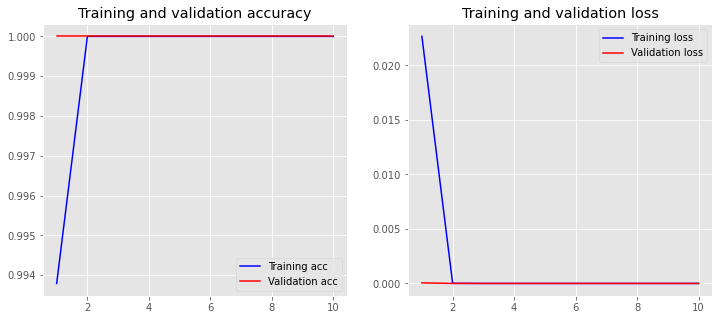

In [ ]:
from keras.backend import clear_session
clear_session()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [ ]:
# model.predict([X_test])

## Deep Learning Model

In [ ]:
q_train, q_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(q_train)
X_train = tokenizer.texts_to_sequences(q_train)
X_test = tokenizer.texts_to_sequences(q_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(q_train[2])
print(X_train[2])



from keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

What is the label or title of the X-axis ?
[5, 4, 1, 38, 48, 30, 3, 1, 58, 22]


### Without Embedding

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           63450     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 63,971
Trainable params: 63,971
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  1.0000


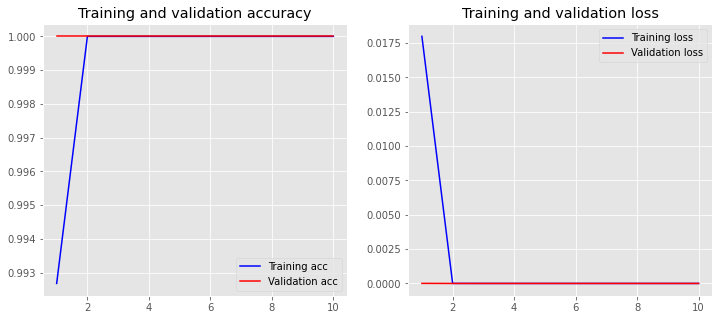

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# model.predict([X_test])

### With Embedding

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip -d glove
# !rm glove.6B.zip

In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.33041999,  0.24995001, -0.60873997, ..., -0.50703001,
        -0.027273  , -0.53285003],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15294001, -0.091239  ,  0.16505   , ...,  1.30949998,
        -0.49652001, -0.36366001]])

In [ ]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8022064617809299

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model.add(LSTM(64))
# model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           63450     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 63,971
Trainable params: 63,971
Non-trainable params: 0
_________________________________________________________________


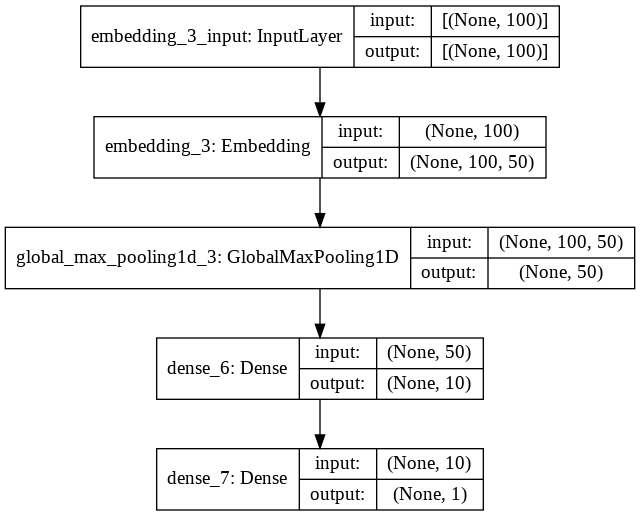

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

Training Accuracy: 1.0000
Testing Accuracy:  1.0000


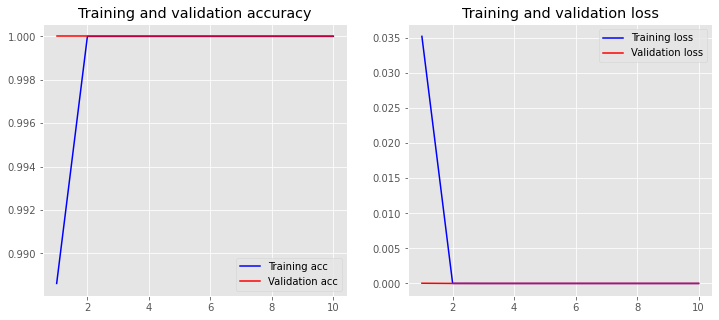

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
q_test[:10]

array(['Is the difference between the gross enrolment ratio(male) in pre-primary schools in Panama and Japan greater than the difference between the gross enrolment ratio(male) in primary schools in Panama and Japan ?',
       'Are all the bars in the graph horizontal ?',
       'What does the 2nd bar from the left in 1999 represents ?',
       'Is the percentage of children who received treatment for malaria strictly greater than the percentage of children who received treatment for diarrhoea over the years ?',
       'Is the sum of the export of goods as percentage of gdp in 1978 and 1980 greater than the maximum external balance on goods as percentage of gdp across all years ?',
       'Is the percentage of economically active male population in Netherlands less than that in New Zealand ?',
       'Across all years, what is the minimum entrance age of children in lower secondary education ?',
       'In the year 1989, what is the difference between the amount of loans disbursed in S

In [ ]:
model.predict(X_test[:10]).tolist()

[[3.2175304087722623e-10],
 [5.024656732355304e-11],
 [1.0],
 [2.4227866241011142e-11],
 [6.673263937967411e-12],
 [2.8766050652606623e-10],
 [1.0],
 [1.0],
 [1.3996047376618748e-10],
 [1.0]]

# Save and Load the model

In [ ]:
model.save('binary_classifier.h5')

In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
files.download("binary_classifier.h5")
files.download("tokenizer.pickle")

  adding: binary_classifier/ (stored 0%)
  adding: binary_classifier/variables/ (stored 0%)
  adding: binary_classifier/variables/variables.data-00000-of-00001 (deflated 63%)
  adding: binary_classifier/variables/variables.index (deflated 61%)
  adding: binary_classifier/assets/ (stored 0%)
  adding: binary_classifier/saved_model.pb (deflated 88%)
  adding: binary_classifier/keras_metadata.pb (deflated 86%)


In [ ]:
# Run from here

In [ ]:
from keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Binary_Classifier/binary_classifier.h5')

with open('/content/drive/MyDrive/Binary_Classifier/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [ ]:
questions = ['How many different coloured dotlines are there ?' ,
'Is the number of dotlines equal to the number of legend labels ?' ,
'What is the number of tourist arrivals in 1997 ?' ,
'Across all years, what is the maximum number of tourist arrivals ?' ,
'Across all years, what is the minimum number of tourist departures ?' ,
'In which year was the number of tourist arrivals maximum?' ,
'In which year was the number of tourist departures minimum?' ,
'What is the total number of tourist departures in the graph ?' ,
'What is the difference between the number of tourist arrivals in 1996 and that in 2000 ?' ,
'What is the difference between the number of tourist departures in 1997 and the number of tourist arrivals in 1998?' ,
'What is the average number of tourist arrivals per year?' ,
'In the year 1997, what is the difference between the number of tourist departures and number of tourist arrivals ?' ,
'In how many years, is the number of tourist departures greater than 180000 ?' ,
'What is the ratio of the number of tourist arrivals in 1995 to that in 1997?' ,
'Is the number of tourist departures in 1998 less than that in 1999 ?' ,
'Is the difference between the number of tourist departures in 1998 and 2000 greater than the difference between the number of tourist arrivals in 1998 and 2000 ?' ,
'What is the difference between the highest and the second highest number of tourist arrivals ?' ,
'What is the difference between the highest and the lowest number of tourist arrivals ?' ,
'In how many years, is the number of tourist departures greater than the average number of tourist departures taken over all years ?' ,
'Is the sum of the number of tourist departures in 1997 and 1998 greater than the maximum number of tourist arrivals across all years ?' ,
'Does the number of tourist departures monotonically increase over the years ?' ,
'Is the number of tourist arrivals strictly greater than the number of tourist departures over the years ?' ,
'Is the number of tourist departures strictly less than the number of tourist arrivals over the years ?' ,
'How many dotlines are there ?' ,
'How many years are there in the graph ?' ,
'What is the difference between two consecutive major ticks on the Y-axis ?' ,
'Are the values on the major ticks of Y-axis written in scientific E-notation ?' ,
'Does the graph contain any zero values ?' ,
'Does the graph contain grids ?' ,
'Where does the legend appear in the graph ?' ,
'How many legend labels are there ?' ,
'How are the legend labels stacked ?' ,
'What is the title of the graph ?' ,
'Does "Sanitation services" appear as one of the legend labels in the graph ?' ,
'What is the label or title of the X-axis ?' ,
'What is the label or title of the Y-axis ?']

In [ ]:
questions = ['is the sum of the consumption of fixed capital in 2002 and 2004 greater than the maximum consumption of fixed capital across all years ?',
             'is the difference between the consumption of fixed capital in 2005 and 2006 greater than the difference between any two years ?',
             'do a majority of the years between 2004 and 2005 (inclusive) have consumption of fixed capital greater than 4.8 % ?'
]

In [ ]:
maxlen = 100
seq= loaded_tokenizer.texts_to_sequences(questions)
padded = pad_sequences(seq, maxlen=maxlen)
predictions = model.predict(padded)

result = []
for e in predictions:
  result.append(e[0])

result

[1.4937348e-11, 1.2639763e-11, 3.8474384e-09]

In [ ]:
# img id = 16662
THRESHOLD = 0.5
for i in range(len(result)):
    print("Question = ", questions[i])

    # Class 0
    if result[i] < THRESHOLD:
        print("Class 0: Tabfact")

    else:
        print("Class 1: Tapas")

Question =  is the sum of the consumption of fixed capital in 2002 and 2004 greater than the maximum consumption of fixed capital across all years ?
Class 0: Tabfact
Question =  is the difference between the consumption of fixed capital in 2005 and 2006 greater than the difference between any two years ?
Class 0: Tabfact
Question =  do a majority of the years between 2004 and 2005 (inclusive) have consumption of fixed capital greater than 4.8 % ?
Class 0: Tabfact
